In [1]:
import pickle
import os

import pandas as pd
import shap

from common import preprocess_df

CURR_DIR = os.path.dirname(os.path.realpath('__file__'))
PROJ_ROOT = os.path.dirname(CURR_DIR)  # assuming .../PROJ_ROOT/scripts/visualize_SHAP.ipynb
DATASET = "CTU-13"
CLASSIFIER = "ebmclassifier"

RESULTS_DIR = os.path.join(PROJ_ROOT, 'results', DATASET)
SHAP_RESULTS = "shap/shapley_explanations.pk"
PREDICTIONS = f"pred_vs_true_{CLASSIFIER}.csv"

PREDICTIONS_HEADER = ["Index", "y_pred", "y_true", "correct_predicted"]

In [2]:
shap_values = pickle.load(open(os.path.join(RESULTS_DIR, SHAP_RESULTS), "rb"))
len(shap_values)

3909

In [3]:
pred_df = pd.read_csv(os.path.join(RESULTS_DIR, PREDICTIONS), index_col=False, header=None, names=PREDICTIONS_HEADER)
pred_df = preprocess_df(pred_df)
pred_df

,y_pred,y_true,correct_predicted
0,1,0,False
1,1,1,True
2,1,1,True
3,1,1,True
4,0,0,True
...,...,...,...
3904,0,0,True
3905,0,0,True
3906,0,0,True
3907,1,1,True


In [4]:
# Determine the accuracy of the explainable set 
accuracy = pred_df["correct_predicted"].mean()

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


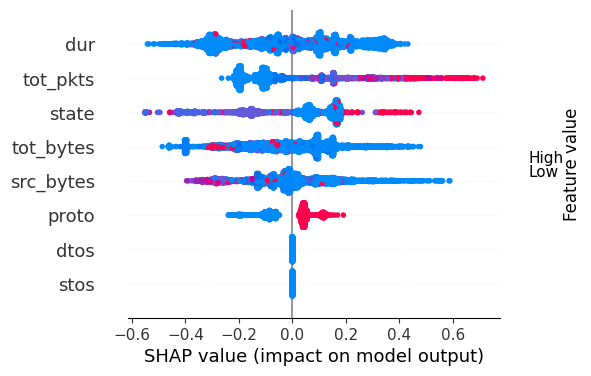

In [5]:
shap.summary_plot(shap_values, show=True, plot_size=(6,4))

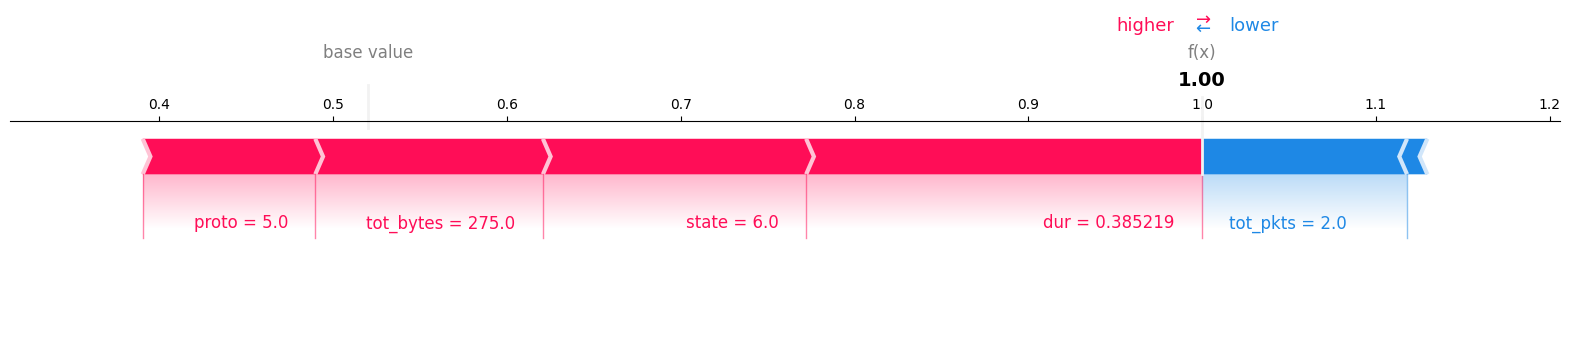

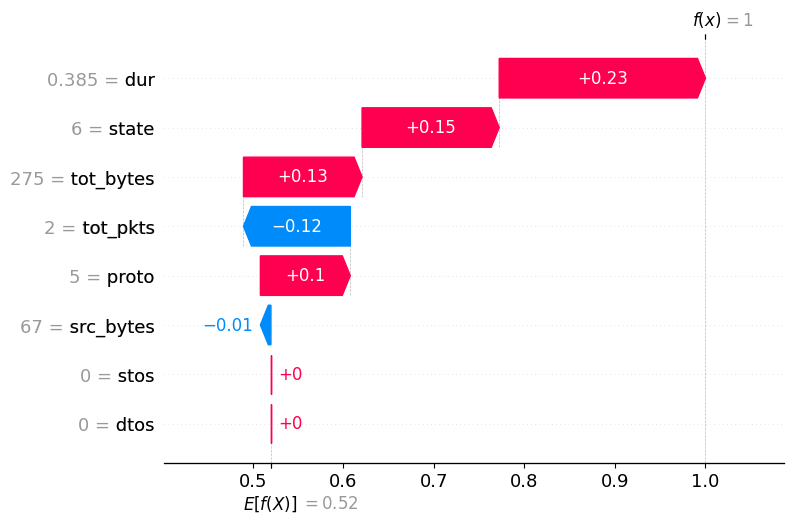

In [6]:
# print(shap_values[0])
# print(type(shap_values[0]))

shap.plots.force(shap_values[0], matplotlib=True, show=True)
shap.plots.waterfall(shap_values[0], show=True)
